In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt


#1: Load data và xử lý data

In [35]:
df = pd.read_csv('D:\\VS CODE\\project1\\online_retail_listing\\online_retail_listing.csv', delimiter= ';', encoding= 'unicode_escape')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [37]:
## Loại bỏ các dòng bị trung lặp
df = df[~df.duplicated()]

In [38]:
## Loại bỏ NaN
df = df.dropna(axis = 0, how = 'any')
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [39]:
# Đổi kiểu dữ liệu của côt Price từ Object thành Float
def Joinx (x):
    str = x.split(',')
    return '.'.join(str)

df['Price'] = df['Price'].apply(Joinx)
df['Price'] = df['Price'].astype(float)

In [40]:
# Loại bỏ các dòng dữ liệu có giá trị âm
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0 ]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767369 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      767369 non-null  object 
 1   StockCode    767369 non-null  object 
 2   Description  767369 non-null  object 
 3   Quantity     767369 non-null  int64  
 4   InvoiceDate  767369 non-null  object 
 5   Price        767369 non-null  float64
 6   Customer ID  767369 non-null  float64
 7   Country      767369 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 52.7+ MB


Taks 2: PHÂN TÍCH

In [42]:
# Thêm cột Sales = Price * Quantity
df['Sales'] = df['Price']*df['Quantity'];
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.0,United Kingdom,30.0


In [43]:
# Tính tổng doanh thu
Total_Sales = round(df['Sales'].sum(), 2)
Total_Sales

16956900.95

In [44]:
# Tính tổng doanh thu theo theo Country
Total_Sales_Country = round(df.groupby('Country').sum()['Sales'].nlargest(n =10), 2)
Total_Sales_Country = Total_Sales_Country.sort_index()
Total_Sales_Country

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\2776671115.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Sales_Country = round(df.groupby('Country').sum()['Sales'].nlargest(n =10), 2)


Country
Australia           169283.46
Denmark              68411.79
EIRE                610268.57
France              343984.68
Germany             417798.41
Netherlands         542310.07
Spain               108016.28
Sweden               91277.82
Switzerland         100061.94
United Kingdom    14009957.79
Name: Sales, dtype: float64

In [45]:
plt.style.use('ggplot')

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\2759503535.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Total_Sales_Country.index, rotation = 90);


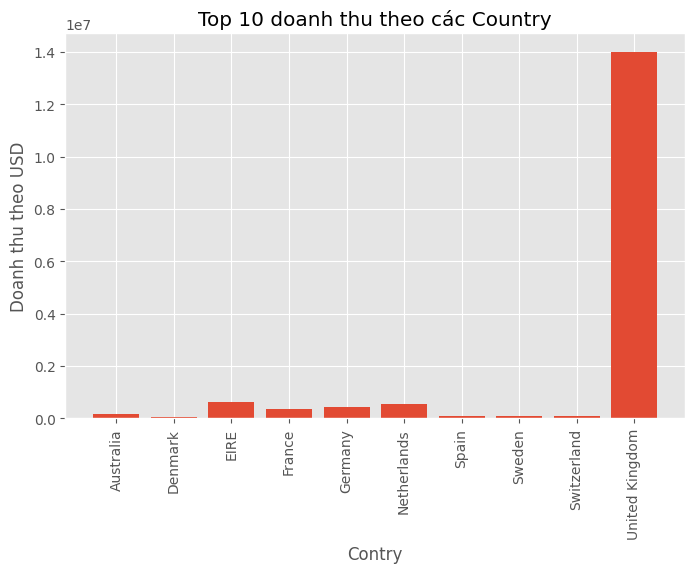

In [46]:
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(Total_Sales_Country.index, Total_Sales_Country)
ax.set(title = 'Top 10 doanh thu theo các Country', xlabel= 'Contry', ylabel= 'Doanh thu theo USD')
ax.set_xticklabels(Total_Sales_Country.index, rotation = 90);



Nước Biểu đồ ở trên thể hiện top 10 doanh thu theo các nước và nước United Kingdom là số doanh thu cao nhất

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\2173391431.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x= df.groupby('Country').sum()['Quantity'].nlargest(n=10).sort_index()
C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\2173391431.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( x.index , rotation  = 90);


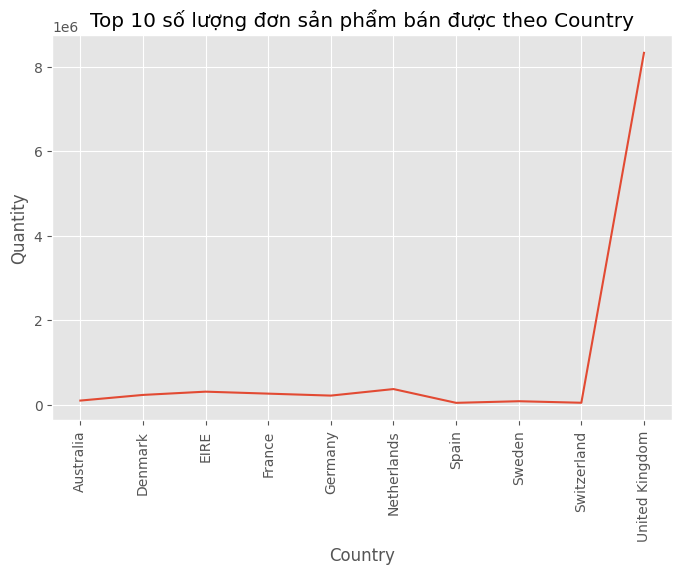

In [47]:
# Top 10 tổng số lượng sản phẩm được bán chia theo Country
x= df.groupby('Country').sum()['Quantity'].nlargest(n=10).sort_index()
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x.index, x)
ax.set(xlabel= 'Country', ylabel= 'Quantity', title= 'Top 10 số lượng đơn sản phẩm bán được theo Country')
ax.set_xticklabels( x.index , rotation  = 90);

Biểu đồ ở trên thể hiện Top 10 số lượng bán sản phẩm được bán theo các nước và nước United Kingdom là có số lượng sản phẩm được bán cao nhất

In [48]:
#Đổi kiểu dữ liệu cột InvoiceDate từ object thành datetime
print(df['InvoiceDate'].dtypes)

object


In [49]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767369 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      767369 non-null  object        
 1   StockCode    767369 non-null  object        
 2   Description  767369 non-null  object        
 3   Quantity     767369 non-null  int64         
 4   InvoiceDate  767369 non-null  datetime64[ns]
 5   Price        767369 non-null  float64       
 6   Customer ID  767369 non-null  float64       
 7   Country      767369 non-null  object        
 8   Sales        767369 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 58.5+ MB


In [50]:
# Thêm cột giờ, ngày, tháng và ngày trong tuần
df['Hour'] = df['InvoiceDate'].dt.hour
df['Days'] = df['InvoiceDate'].dt.day
df['Months'] = df['InvoiceDate'].dt.month
df['DayOfWeel'] = df['InvoiceDate'].dt.day_name()
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Hour,Days,Months,DayOfWeel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,7,12,1,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,7,12,1,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,7,12,1,Monday


C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\1721424570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Quantity_Hour = df.groupby('Hour').sum()['Quantity'].sort_index()


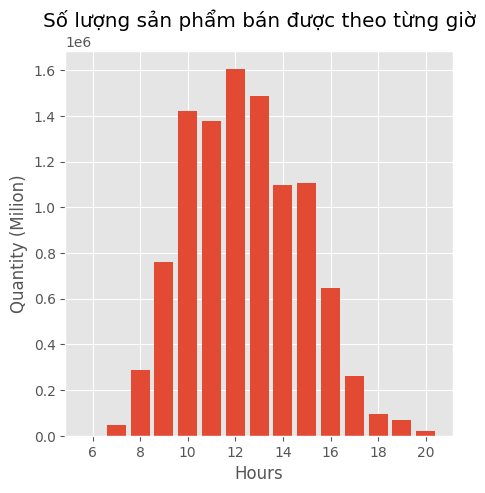

In [51]:
# Giờ nào bán được nhiều sản phẩm nhất
Total_Quantity_Hour = df.groupby('Hour').sum()['Quantity'].sort_index()
fig, ax = plt.subplots(figsize = (5,5))
ax.bar(Total_Quantity_Hour.index, Total_Quantity_Hour)
ax.set(title= 'Số lượng sản phẩm bán được theo từng giờ', xlabel= 'Hours', ylabel= 'Quantity (Milion)');

Biểu đồ trên thể hiện Tổng số lượng sản phẩm bán được theo từng giờ, và có thể nhận thấy sản phẩm được bán nhiều từ 9h cho đến 17h. Và số lượng sản phẩm bán cao nhất là rơi vào 12h

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\464016838.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Quantity_Days = df.groupby('Days').sum()['Quantity'].sort_index()


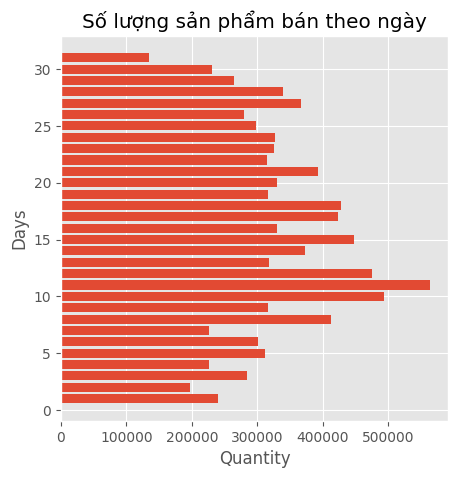

In [52]:
# Ngày nào bán được nhiều sản phẩm
Total_Quantity_Days = df.groupby('Days').sum()['Quantity'].sort_index()
fig, ax = plt.subplots(figsize = (5,5))
ax.barh(Total_Quantity_Days.index, Total_Quantity_Days)
ax.set(title = 'Số lượng sản phẩm bán theo ngày', ylabel= 'Days', xlabel= 'Quantity');

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\2403651025.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Quantity_Months = df.groupby('Months').sum()['Quantity']


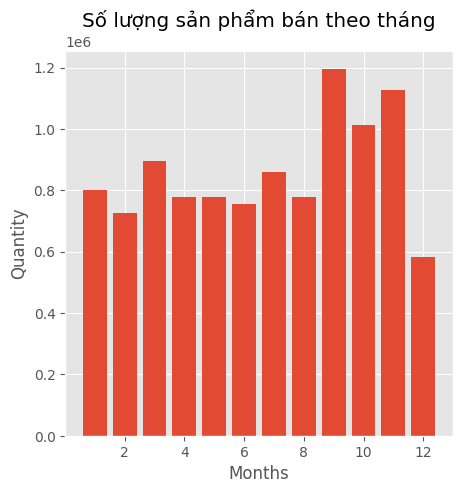

In [53]:
# Tháng nào bán sản phẩm nhiều
Total_Quantity_Months = df.groupby('Months').sum()['Quantity']
fig, ax = plt.subplots(figsize = (5,5))
ax.bar(Total_Quantity_Months.index, Total_Quantity_Months)
ax.set(title = 'Số lượng sản phẩm bán theo tháng', ylabel= 'Quantity', xlabel= 'Months');

In [54]:
#Sản phẩm nào bán nhiều nhất
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Hour,Days,Months,DayOfWeel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,7,12,1,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,7,12,1,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,7,12,1,Monday


C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\3076144813.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Quantity_DayofWeek = df.groupby('DayOfWeel').sum()['Quantity']
C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\3076144813.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90);


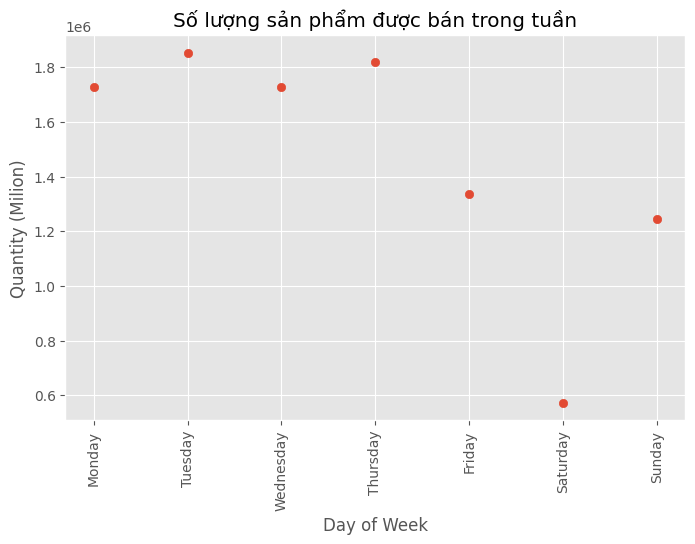

In [55]:
# Số lượng sản phẩm bán theo thứ trong tuần (Day of week)

x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Total_Quantity_DayofWeek = df.groupby('DayOfWeel').sum()['Quantity']
y= []

for i in range(7):
    for j in range(7):
        if x[i] == Total_Quantity_DayofWeek.index[j]:
            y.append(Total_Quantity_DayofWeek[j])


fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x, y)
ax.set(title= 'Số lượng sản phẩm được bán trong tuần', xlabel= 'Day of Week', ylabel= 'Quantity (Milion)');
ax.set_xticklabels(x, rotation = 90);


C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\1868259642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_Quantity_StockCode = df.groupby('StockCode').sum()['Quantity'].nlargest(n=10)


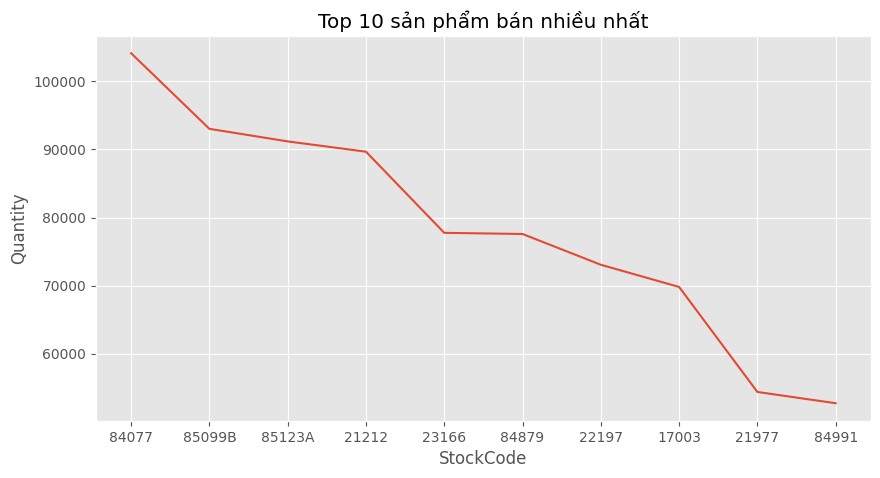

In [56]:
# Top 10 sản phản bán chạy nhiều nhất
Total_Quantity_StockCode = df.groupby('StockCode').sum()['Quantity'].nlargest(n=10)
fig, ax = plt.subplots(figsize =(10,5))
ax.plot(Total_Quantity_StockCode.index,Total_Quantity_StockCode )
ax.set(title='Top 10 sản phẩm bán nhiều nhất', ylabel= 'Quantity', xlabel= 'StockCode');


In [57]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Hour,Days,Months,DayOfWeel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,7,12,1,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,7,12,1,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,7,12,1,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,7,12,1,Monday


In [58]:
## Phân loại khách hàng theo doanh thu (Sales)
df_Customer = df.groupby('Customer ID').sum()['Sales'].sort_values(ascending = False)
df_Customer = df_Customer.to_frame().reset_index()
df_Customer.head()


C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\3780254577.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Customer = df.groupby('Customer ID').sum()['Sales'].sort_values(ascending = False)


,Customer ID,Sales
0,18102.0,569501.50
1,14646.0,516874.50
2,14156.0,313437.62
3,14911.0,285118.84
4,17450.0,244784.25


In [59]:
df_Customer['Customer Kind']  = np.where (df_Customer['Sales'] > 100000, 'KH Vip', 'KH thường') ## Tạo thêm cột phân loại khách hàng
df_Customer

,Customer ID,Sales,Customer Kind
0,18102.0,569501.50,KH Vip
1,14646.0,516874.50,KH Vip
2,14156.0,313437.62,KH Vip
3,14911.0,285118.84,KH Vip
4,17450.0,244784.25,KH Vip
...,...,...,...
5855,14792.0,6.20,KH thường
5856,16738.0,3.75,KH thường
5857,13788.0,3.75,KH thường
5858,14095.0,2.95,KH thường


In [66]:
# So sánh  doanh thu theo từng tháng của top 4 quốc có doanh thu cao nhất
df.groupby('Country').sum()['Sales'].nlargest(n=4) ## TÌm top 4 nước có doanh thu cao nhất

C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\1473352623.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').sum()['Sales'].nlargest(n=4)


Country
United Kingdom    1.400996e+07
EIRE              6.102686e+05
Netherlands       5.423101e+05
Germany           4.177984e+05
Name: Sales, dtype: float64

In [86]:
df_Sales_Top4 = df.groupby(['Country', 'Months']).sum()['Sales'].reset_index()
df_Sales_Top4 = df_Sales_Top4[(df_Sales_Top4['Country']=='United Kingdom') | (df_Sales_Top4['Country']=='EIRE') | (df_Sales_Top4['Country']=='Netherlands') | (df_Sales_Top4['Country']=='Germany') ]
df_Sales_Top4.head()


C:\Users\Nguyen Thanh Tien\AppData\Local\Temp\ipykernel_8604\3345719754.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Sales_Top4 = df.groupby(['Country', 'Months']).sum()['Sales'].reset_index()


,Country,Months,Sales
85,EIRE,1,53343.96
86,EIRE,2,22910.60
87,EIRE,3,47144.65
88,EIRE,4,33799.04
89,EIRE,5,33331.77


<AxesSubplot: xlabel='Months', ylabel='Sales'>

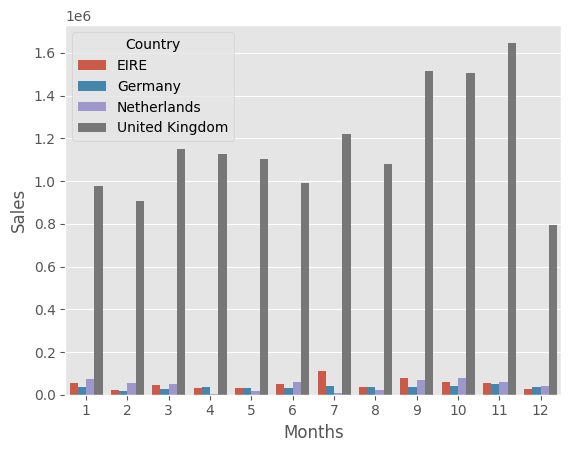

In [97]:
sns.barplot(data =df_Sales_Top4 , x = 'Months', y = 'Sales' , hue = 'Country')

Dễ dàng nhận thấy United Kingdom có doanh thu tháng  cao hơn rất  nhiều so với các nước còn lại


c:\Users\Nguyen Thanh Tien\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


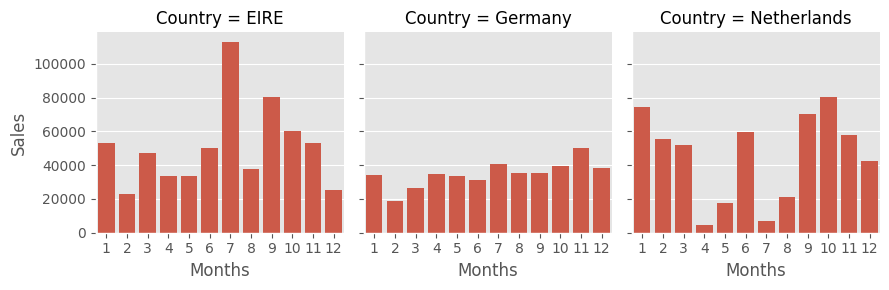

In [99]:
# Tìm doanh thu thàng vượt trội của top 3  nước đạt doanh thu cao nhất trừ nước United Kingdom
df_Sales_Top234 = df_Sales_Top4[ (df_Sales_Top4['Country']=='EIRE') | (df_Sales_Top4['Country']=='Netherlands') | (df_Sales_Top4['Country']=='Germany') ]

Sales_fig = sns.FacetGrid(data = df_Sales_Top234, col = 'Country')
Sales_fig.map(sns.barplot, 'Months', 'Sales')

Dễ dàng thấy trê biểu đồ:
- Ở nước EIRE: doanh thu cao nhất rơi vào tháng 7, thấp nhất vào tháng 2
- Ở nước Germany: đa số các tháng có doanh thu đồng đều với nhau, chỉ có tháng 2 thì doanh thu thấp so với các tháng còn lại
- Ở nước Netherlands: doanh thu cao rơi vào tháng 1, 9 , 10 . Doanh thu thấp rơi vào tháng 4, 5,7,8


In [107]:
# So sánh số lượng đơn hàng được đặt theo từng giờ của top 4 nước có số lượng đặt sản phẩm cao nhất
df.groupby('Country').count()['Quantity'].nlargest(n=4) # Tìm 4 nước có số lượng đặt hàng cao nhất


Country
United Kingdom    689567
Germany            16153
EIRE               15280
France             13284
Name: Quantity, dtype: int64

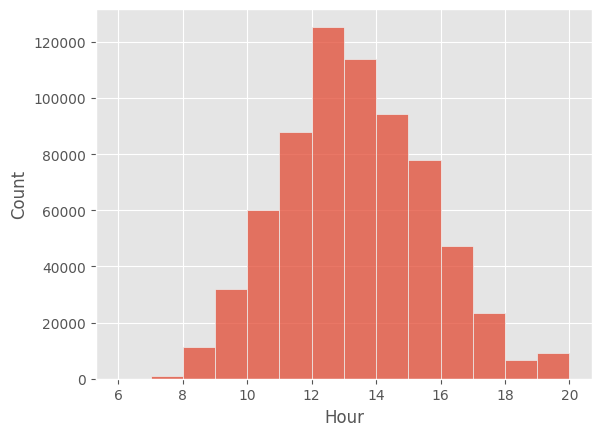

In [132]:
# So sánh số lượng đơn hàng của nước United Kingdom theo từng giờ
df_UK = df[df['Country'] == 'United Kingdom']
sns.histplot(data=df_UK['Hour'], binwidth=1);

Dễ thấy số lượng đặt đơn hàng ở United Kingdom  cao vào lúc 11h đến 14h 

In [175]:
# So sánh số lượng đặt hàng của top 3 nước còn lại theo khung giờ
df_Count_Top234 = df[(df['Country'] == 'Germany') | (df['Country'] == 'EIRE') | (df['Country'] == 'France')]
df_Count_Top234 = df_Count_Top234.groupby(['Months', 'Country'])['Invoice'].count()
df_Count_Top234 = df_Count_Top234.reset_index()
df_Count_Top234.head()


,Months,Country,Invoice
0,1,EIRE,1064
1,1,France,890
2,1,Germany,1527
3,2,EIRE,776
4,2,France,710


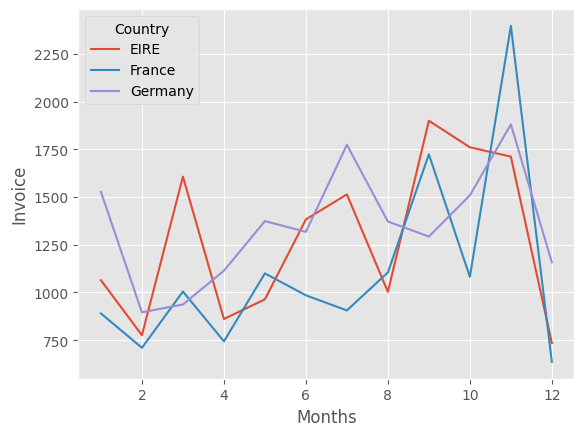

In [181]:
sns.lineplot(data = df_Count_Top234, x ='Months', y = 'Invoice', hue = 'Country');